# Initialize

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from keras import regularizers
from keras.optimizers import Adam 


# Load dataset

In [2]:
train = pd.read_csv('./data/0.8_train.csv', header=None)
test = pd.read_csv('./data/0.2_test.csv', header=None)

print("train_data : ", np.shape(train))
print("test_data  : ", np.shape(test))

train_data :  (53102, 441)
test_data  :  (13276, 441)


In [3]:
# 0.0 Normal beat
# 1.0 LBBB beat
# 2.0 RBBB beat
# 3.0 PVC beat
# 4.0 PAC beat

print('data train per class')
print(train[440].value_counts())
print('---------------------------------')
print('data test per class')
print(test[440].value_counts())

data train per class
0.0    13152
1.0    12938
2.0    11508
3.0    11421
4.0     4083
Name: 440, dtype: int64
---------------------------------
data test per class
0.0    3244
1.0    3200
2.0    2992
3.0    2835
4.0    1005
Name: 440, dtype: int64


In [4]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
train_y=to_categorical(target_train)
test_y=to_categorical(target_test)
print(np.shape(train_y), np.shape(test_y))

(53102, 5) (13276, 5)


In [5]:
train_x = train.iloc[:,:train.shape[1]-1].values
test_x = test.iloc[:,:test.shape[1]-1].values
train_x = train_x.reshape(len(train_x), train_x.shape[1],1)
test_x = test_x.reshape(len(test_x), test_x.shape[1],1)
print(np.shape(train_x), np.shape(test_x))

(53102, 440, 1) (13276, 440, 1)


# Model architecture

In [6]:
# Instanciate an empty model
model = Sequential()

model.add(Conv1D(filters=16, kernel_size=13, padding='same', activation='relu',input_shape=(440, 1)))
model.add(AvgPool1D(pool_size=3, strides=2))
model.add(Conv1D(filters=32, kernel_size=15, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))
model.add(Conv1D(filters=64, kernel_size=17, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))
model.add(Conv1D(filters=128, kernel_size=19, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(35,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
model.add(Dense(5,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
model.add(Softmax())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 440, 16)           224       
                                                                 
 average_pooling1d (AverageP  (None, 219, 16)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 219, 32)           7712      
                                                                 
 average_pooling1d_1 (Averag  (None, 109, 32)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 109, 64)           34880     
                                                                 
 average_pooling1d_2 (Averag  (None, 54, 64)           0

# learning_rate 1e-3, batch_size 32, epoch 100

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

In [8]:
history = model.fit(train_x, train_y, batch_size=32, epochs=100, verbose=1, validation_data=(test_x, test_y))

Epoch 1/100
1660/1660 [==============================] - 108s 64ms/step - loss: 0.3392 - accuracy: 0.8888 - val_loss: 0.1670 - val_accuracy: 0.9507
Epoch 2/100
1660/1660 [==============================] - 108s 65ms/step - loss: 0.1518 - accuracy: 0.9581 - val_loss: 0.1104 - val_accuracy: 0.9718
Epoch 3/100
1660/1660 [==============================] - 110s 66ms/step - loss: 0.1212 - accuracy: 0.9676 - val_loss: 0.0933 - val_accuracy: 0.9768
Epoch 4/100
1660/1660 [==============================] - 115s 69ms/step - loss: 0.1042 - accuracy: 0.9736 - val_loss: 0.0981 - val_accuracy: 0.9757
Epoch 5/100
1660/1660 [==============================] - 117s 70ms/step - loss: 0.0926 - accuracy: 0.9768 - val_loss: 0.0816 - val_accuracy: 0.9806
Epoch 6/100
1660/1660 [==============================] - 114s 68ms/step - loss: 0.0860 - accuracy: 0.9786 - val_loss: 0.0817 - val_accuracy: 0.9815
Epoch 7/100
1660/1660 [==============================] - 109s 65ms/step - loss: 0.0772 - accuracy: 0.9810 - val_

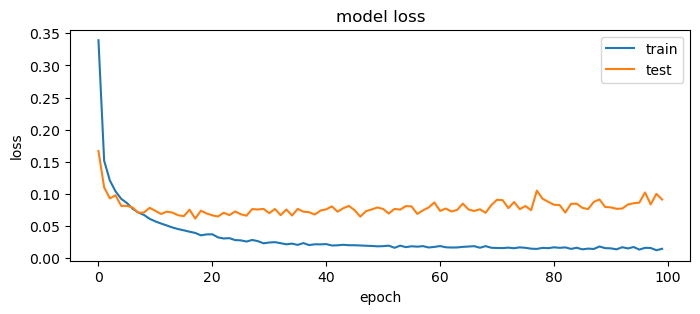

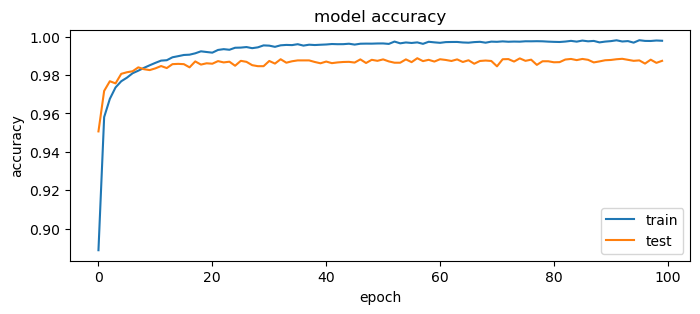

In [9]:
# summarize history for loss
plt.figure(figsize=(8,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for accuracy
plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [10]:
# finding the loss and acuracy of the model
score = model.evaluate(test_x, test_y)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

415/415 [==============================] - 4s 10ms/step - loss: 0.0915 - accuracy: 0.9874
Test Loss: 0.09146443009376526
Test accuracy: 0.987420916557312


In [11]:
# save model
model.save('CNN_model_3')

INFO:tensorflow:Assets written to: CNN_model_3\assets


INFO:tensorflow:Assets written to: CNN_model_3\assets


# confusion matrix

In [12]:
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)
y_pred

415/415 [==============================] - 4s 9ms/step


array([3, 1, 2, ..., 0, 3, 0], dtype=int64)

In [13]:
y_true = test[440]

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
print('confusion matrix')
print(cm)
print('\nclassification report')
report = classification_report(y_true, y_pred, target_names=['N', 'L', 'R', 'V', 'A'], digits=4)
print(report )

def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df
report = report_to_df(report)

# report.to_csv('classification report.csv', index=True)

confusion matrix
[[3190    8   10   18   18]
 [   2 3191    0    6    1]
 [   7    4 2973    5    3]
 [  30    8    3 2788    6]
 [  24    0    2   12  967]]

classification report
              precision    recall  f1-score   support

           N     0.9806    0.9834    0.9820      3244
           L     0.9938    0.9972    0.9955      3200
           R     0.9950    0.9936    0.9943      2992
           V     0.9855    0.9834    0.9845      2835
           A     0.9719    0.9622    0.9670      1005

    accuracy                         0.9874     13276
   macro avg     0.9854    0.9840    0.9846     13276
weighted avg     0.9874    0.9874    0.9874     13276

